✅ Saved plot → labels/plots/game_1_scores.png


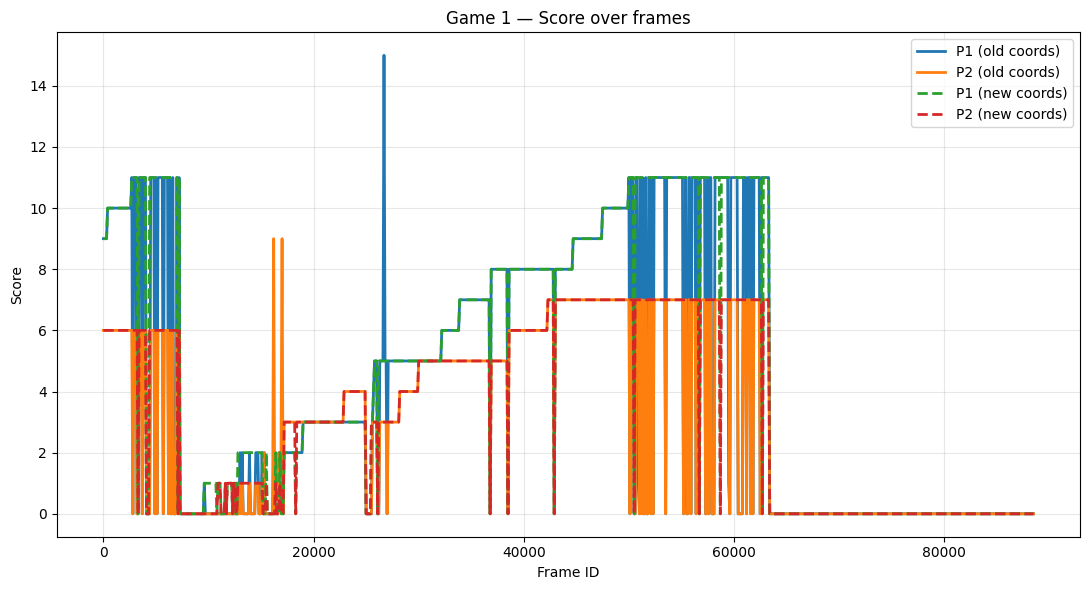

✅ Saved plot → labels/plots/game_2_scores.png


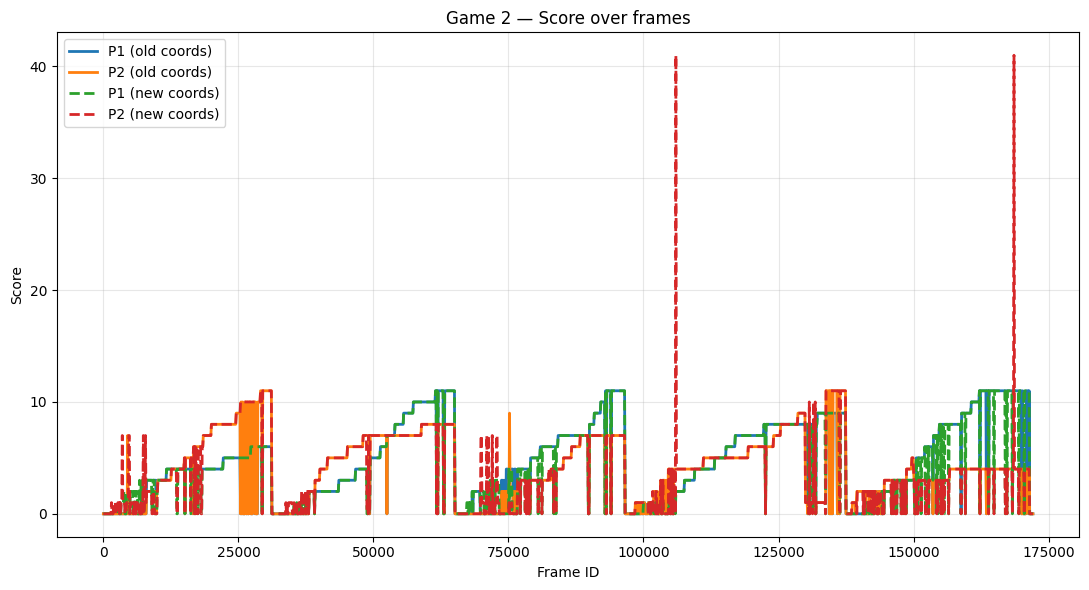

✅ Saved plot → labels/plots/game_3_scores.png


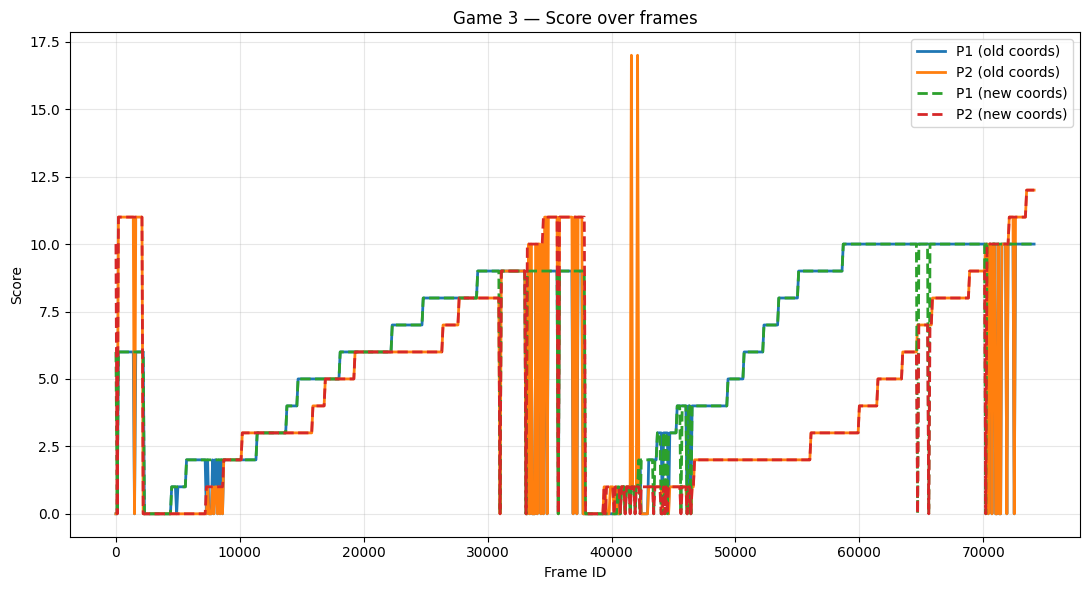

✅ Saved plot → labels/plots/game_4_scores.png


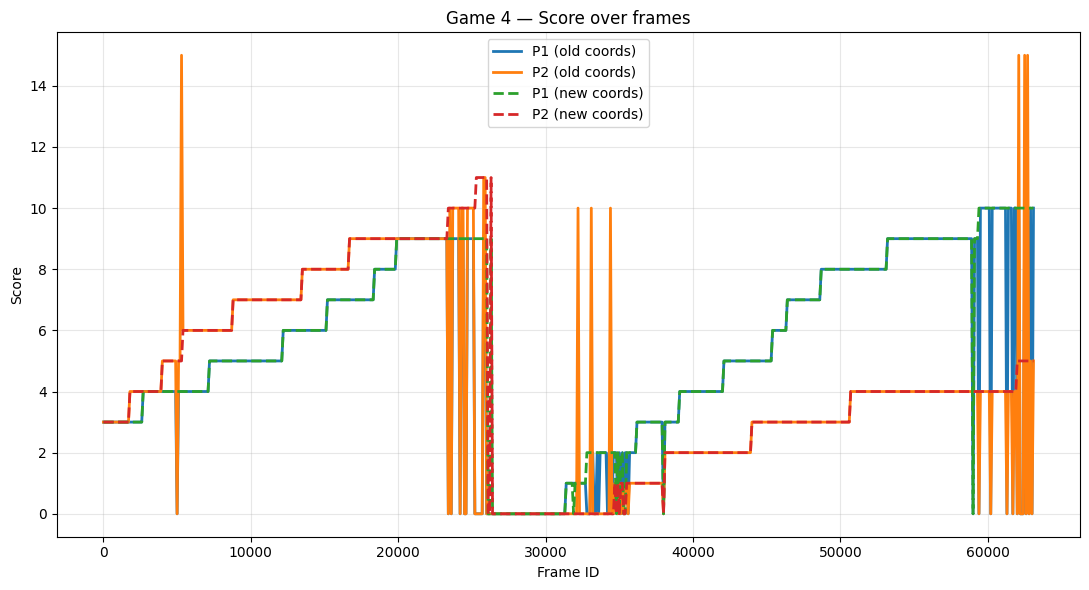

✅ Saved plot → labels/plots/game_5_scores.png


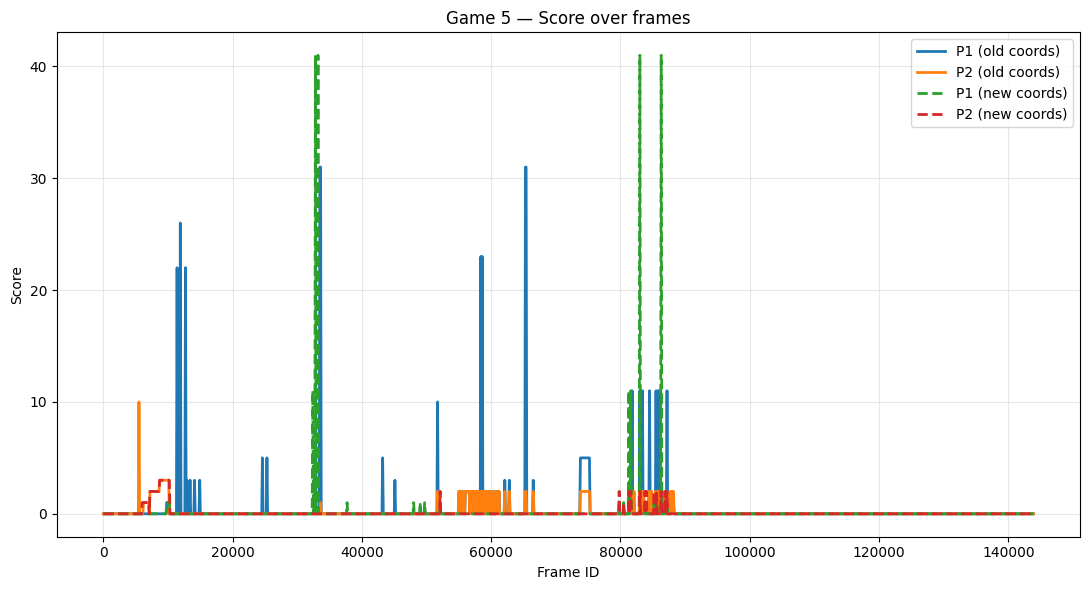

In [1]:
#!/usr/bin/env python3
import csv
import re
from pathlib import Path

import matplotlib.pyplot as plt

LABELS_DIR = Path("./labels")
PLOTS_DIR = LABELS_DIR / "plots"
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

# games to process
GAMES = [1, 2, 3, 4, 5]

SCORE_RX = re.compile(r"^\s*(\d+)\s*-\s*(\d+)\s*$")

def parse_score(cell: str):
    """Return (p1, p2) from 'N-M'; blanks/invalid -> (0,0)."""
    if not cell:
        return 0, 0
    m = SCORE_RX.match(cell)
    if not m:
        return 0, 0
    return int(m.group(1)), int(m.group(2))

def read_csv_scores(path: Path):
    """Return lists x=frames, y1=P1, y2=P2 from a labels CSV."""
    frames, p1s, p2s = [], [], []
    if not path.exists():
        return frames, p1s, p2s
    with path.open(newline="") as f:
        reader = csv.reader(f)
        header = next(reader, None)  # ['frame','score']
        for row in reader:
            if not row:
                continue
            try:
                frame = int(row[0])
            except Exception:
                continue
            p1, p2 = parse_score(row[1].strip() if len(row) > 1 else "")
            frames.append(frame)
            p1s.append(p1)
            p2s.append(p2)
    # sort by frame (just in case)
    order = sorted(range(len(frames)), key=lambda i: frames[i])
    frames = [frames[i] for i in order]
    p1s = [p1s[i] for i in order]
    p2s = [p2s[i] for i in order]
    return frames, p1s, p2s

def plot_game(game_idx: int):
    base = f"game_{game_idx}.csv"
    new  = f"game_{game_idx}_newCoordinates.csv"

    old_path = LABELS_DIR / base
    new_path = LABELS_DIR / new

    x_old, p1_old, p2_old = read_csv_scores(old_path)
    x_new, p1_new, p2_new = read_csv_scores(new_path)

    if not x_old and not x_new:
        print(f"⚠️  No data for game_{game_idx} (missing CSVs?)")
        return

    plt.figure(figsize=(11, 6))
    plt.title(f"Game {game_idx} — Score over frames")

    # Old coordinates (solid)
    if x_old:
        plt.plot(x_old, p1_old, label="P1 (old coords)", linewidth=2)
        plt.plot(x_old, p2_old, label="P2 (old coords)", linewidth=2)
    # New coordinates (dashed)
    if x_new:
        plt.plot(x_new, p1_new, linestyle="--", label="P1 (new coords)", linewidth=2)
        plt.plot(x_new, p2_new, linestyle="--", label="P2 (new coords)", linewidth=2)

    plt.xlabel("Frame ID")
    plt.ylabel("Score")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()

    out_png = PLOTS_DIR / f"game_{game_idx}_scores.png"
    plt.savefig(out_png, dpi=160)
    print(f"✅ Saved plot → {out_png}")
    plt.show()

def main():
    for g in GAMES:
        plot_game(g)

if __name__ == "__main__":
    main()


✅ Saved plot → labels/plots/game_1_p1.png


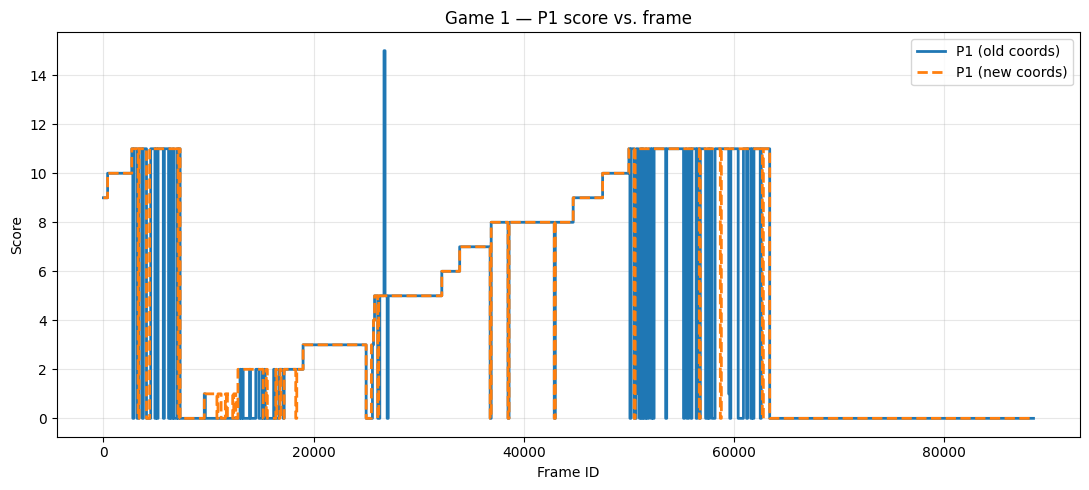

✅ Saved plot → labels/plots/game_1_p2.png


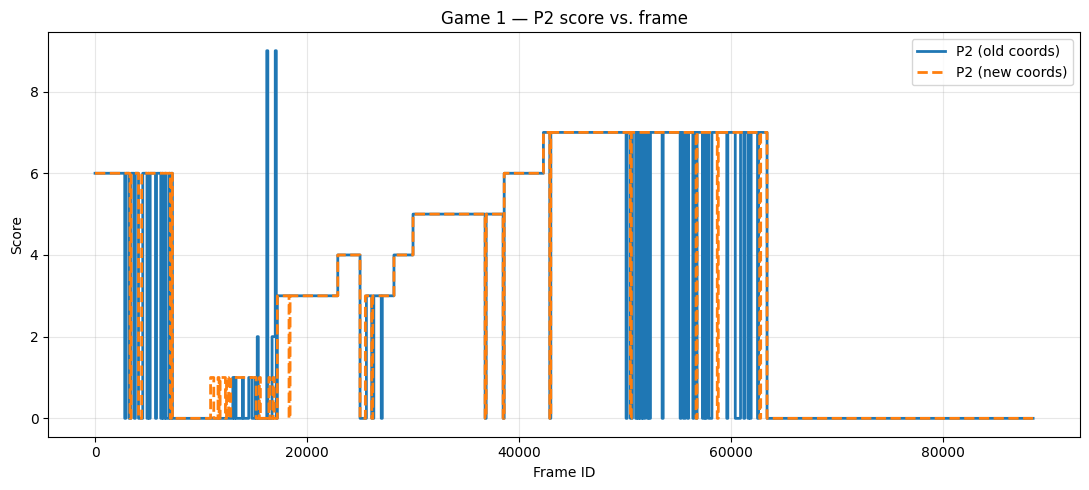

✅ Saved plot → labels/plots/game_2_p1.png


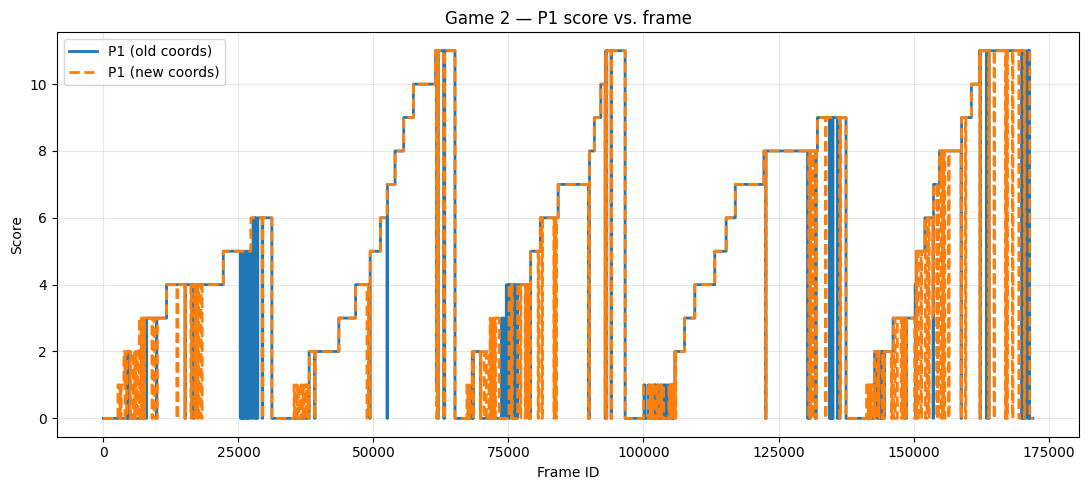

✅ Saved plot → labels/plots/game_2_p2.png


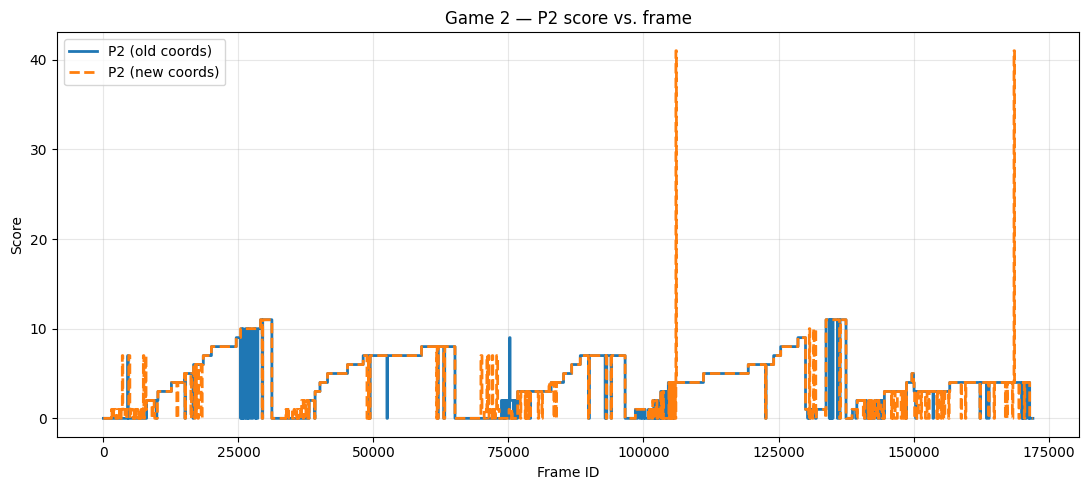

✅ Saved plot → labels/plots/game_3_p1.png


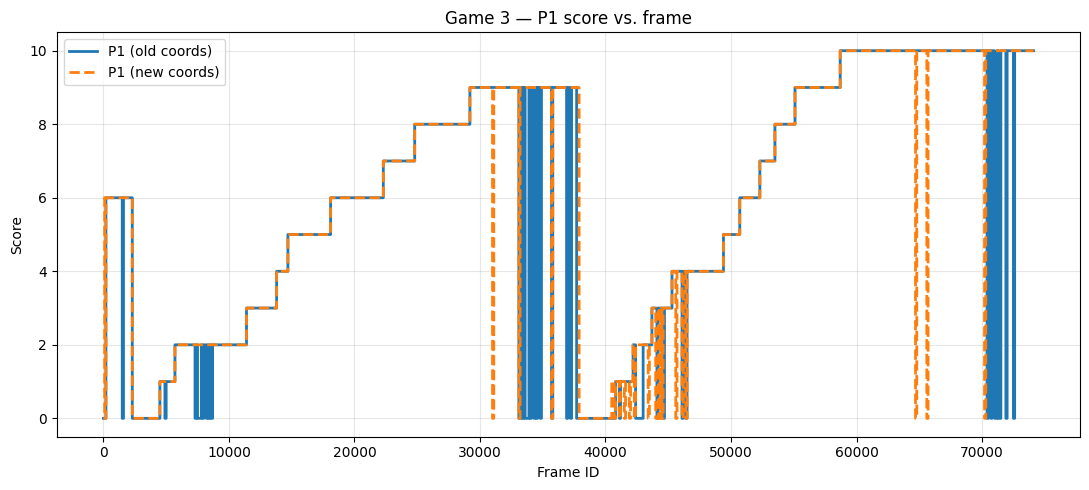

✅ Saved plot → labels/plots/game_3_p2.png


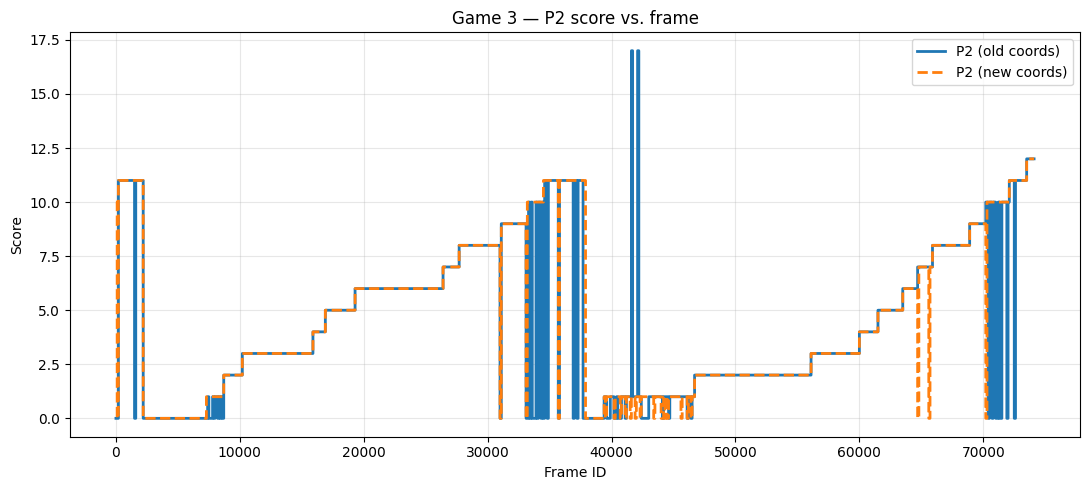

✅ Saved plot → labels/plots/game_4_p1.png


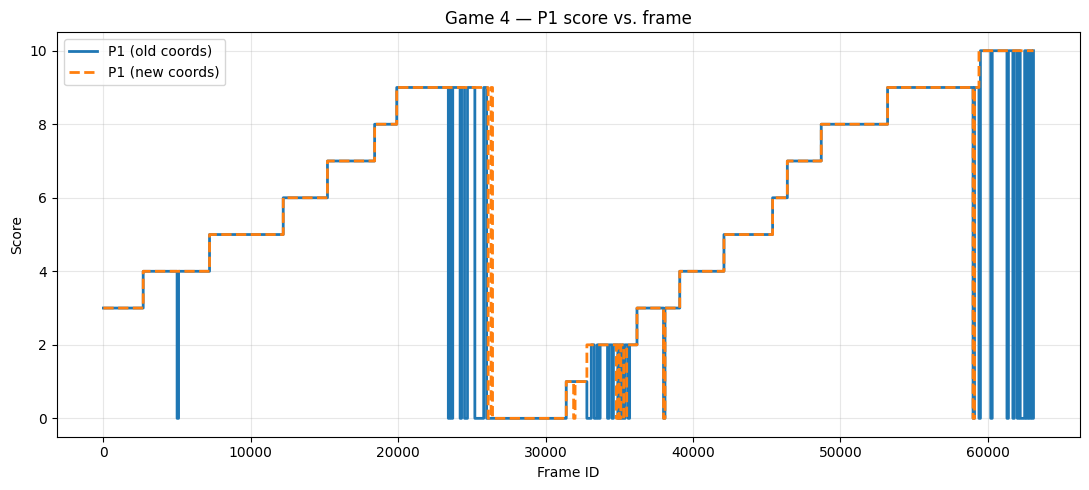

✅ Saved plot → labels/plots/game_4_p2.png


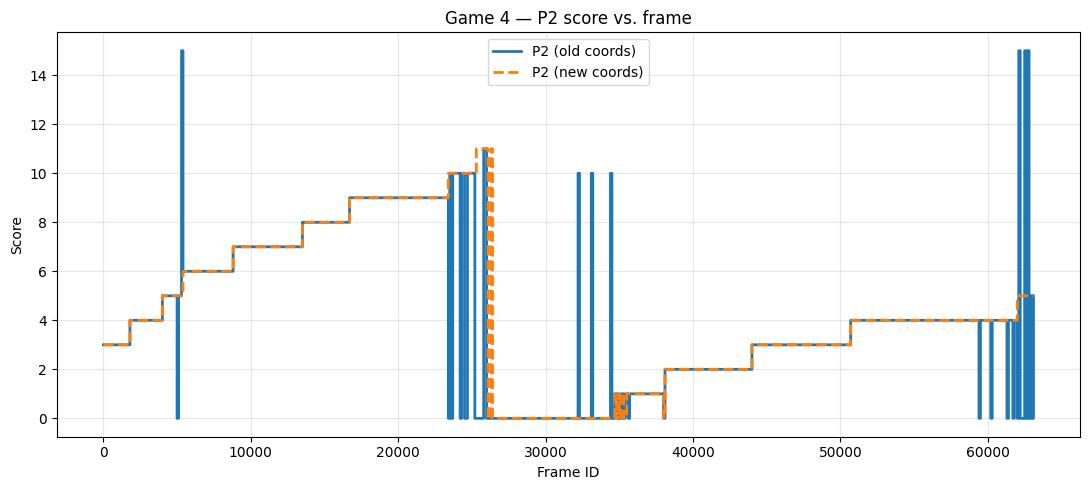

✅ Saved plot → labels/plots/game_5_p1.png


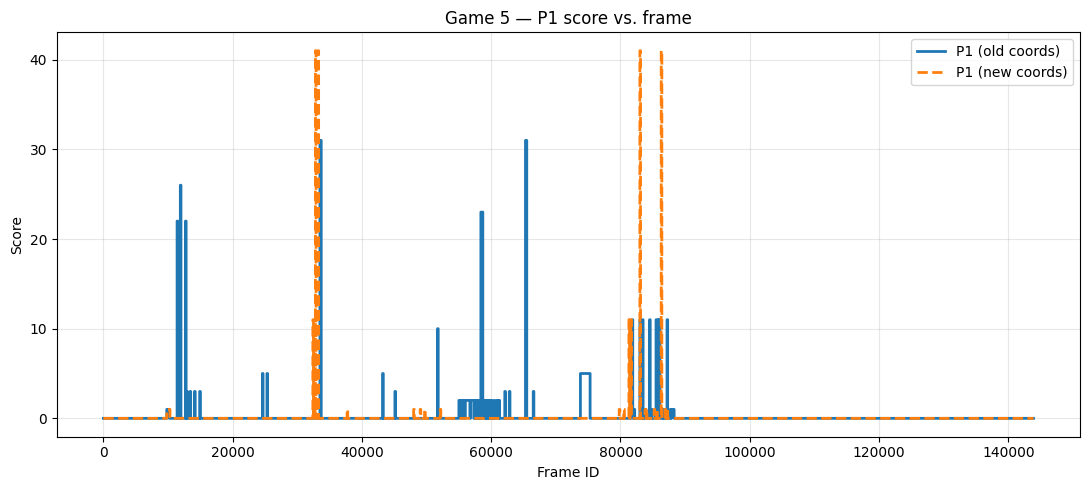

✅ Saved plot → labels/plots/game_5_p2.png


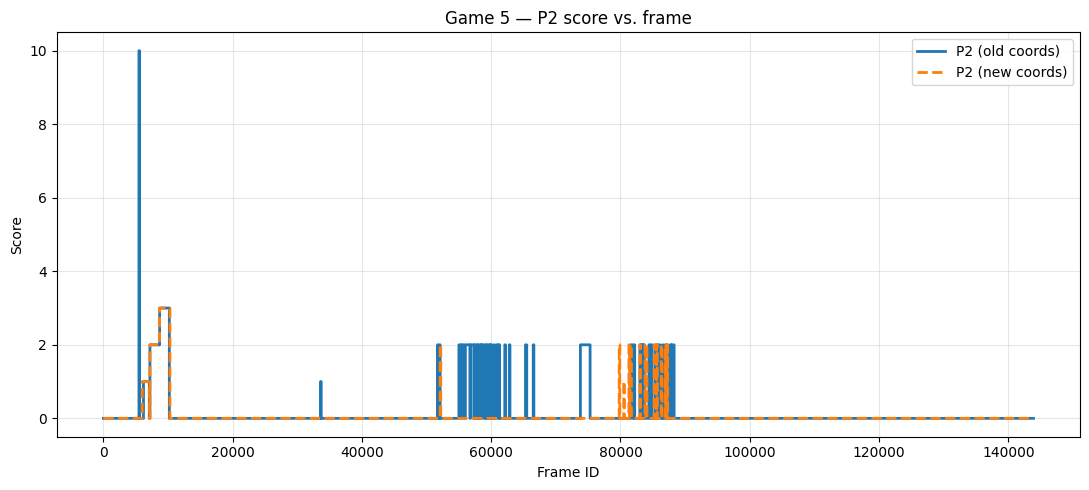

In [2]:
#!/usr/bin/env python3
import csv
import re
from pathlib import Path

import matplotlib.pyplot as plt

LABELS_DIR = Path("./labels")
PLOTS_DIR = LABELS_DIR / "plots"
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

GAMES = [1, 2, 3, 4, 5]
SCORE_RX = re.compile(r"^\s*(\d+)\s*-\s*(\d+)\s*$")

def parse_score(cell: str):
    """Return (p1, p2) from 'N-M'; blanks/invalid -> (0,0)."""
    if not cell:
        return 0, 0
    m = SCORE_RX.match(cell)
    if not m:
        return 0, 0
    return int(m.group(1)), int(m.group(2))

def read_csv_scores(path: Path):
    """Return lists x=frames, y1=P1, y2=P2 from a labels CSV."""
    frames, p1s, p2s = [], [], []
    if not path.exists():
        return frames, p1s, p2s
    with path.open(newline="") as f:
        reader = csv.reader(f)
        header = next(reader, None)  # ['frame','score'] expected
        for row in reader:
            if not row:
                continue
            try:
                frame = int(row[0])
            except Exception:
                continue
            p1, p2 = parse_score(row[1].strip() if len(row) > 1 else "")
            frames.append(frame)
            p1s.append(p1)
            p2s.append(p2)
    # sort by frame
    order = sorted(range(len(frames)), key=lambda i: frames[i])
    frames = [frames[i] for i in order]
    p1s    = [p1s[i]    for i in order]
    p2s    = [p2s[i]    for i in order]
    return frames, p1s, p2s

def step_plot(ax, x, y, label, linestyle="-"):
    if x:
        ax.step(x, y, where="post", label=label, linewidth=2, linestyle=linestyle)

def plot_player(game_idx: int, player: int, show: bool = True):
    """Plot a single player's scores (old vs new) over frames for one game."""
    base = f"game_{game_idx}.csv"
    new  = f"game_{game_idx}_newCoordinates.csv"
    old_path = LABELS_DIR / base
    new_path = LABELS_DIR / new

    x_old, p1_old, p2_old = read_csv_scores(old_path)
    x_new, p1_new, p2_new = read_csv_scores(new_path)

    if not x_old and not x_new:
        print(f"⚠️  No data for game_{game_idx} (missing CSVs?)")
        return

    # choose the series
    y_old = p1_old if player == 1 else p2_old
    y_new = p1_new if player == 1 else p2_new

    title_player = "P1" if player == 1 else "P2"

    fig, ax = plt.subplots(figsize=(11, 5))
    ax.set_title(f"Game {game_idx} — {title_player} score vs. frame")

    step_plot(ax, x_old, y_old, f"{title_player} (old coords)", "-")
    step_plot(ax, x_new, y_new, f"{title_player} (new coords)", "--")

    ax.set_xlabel("Frame ID")
    ax.set_ylabel("Score")
    ax.grid(True, alpha=0.3)
    ax.legend()
    fig.tight_layout()

    out_png = PLOTS_DIR / f"game_{game_idx}_{title_player.lower()}.png"
    fig.savefig(out_png, dpi=160)
    print(f"✅ Saved plot → {out_png}")
    if show:
        plt.show()
    plt.close(fig)

def main():
    for g in GAMES:
        # P1 chart
        plot_player(g, player=1, show=True)
        # P2 chart
        plot_player(g, player=2, show=True)

if __name__ == "__main__":
    main()
